In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [32]:
df = pd.read_csv('data/train.csv')
df.head(10)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
5,5,6,1022.7,20.6,18.6,16.5,12.5,79.0,81.0,0.0,20.0,15.7,1
6,6,7,1022.8,19.5,18.4,15.3,11.3,56.0,46.0,7.6,20.0,28.4,0
7,7,8,1019.7,15.8,13.6,12.7,11.8,96.0,100.0,0.0,50.0,52.8,1
8,8,9,1017.4,17.6,16.5,15.6,12.5,86.0,100.0,0.0,50.0,37.5,1
9,9,10,1025.4,16.5,14.4,12.0,8.6,77.0,84.0,1.0,50.0,38.3,0


In [33]:
df.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [34]:
df.shape

(2190, 13)

In [35]:
df.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [36]:
df.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [37]:
X = df.drop('rainfall',axis=1)
Y = df['rainfall']

In [38]:
X.shape

(2190, 12)

In [39]:
Y.shape

(2190,)

In [40]:
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state= 25)

### Importing required libraries

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,roc_curve, auc

Training the model

In [42]:
# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest

# Train the model
rf.fit(X_train, Y_train)


RandomForestClassifier(random_state=42)

In [43]:
# Predict probabilities (for positive class)
y_probs = rf.predict_proba(x_test)[:, 1]

In [44]:
# Compute ROC-AUC Score
auc_score = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {auc_score:.4f}")

ROC-AUC Score: 0.8956


Training the model using XGbBoost classifier

In [45]:
import xgboost as xgb
from xgboost import XGBClassifier

In [46]:
xgb_model = XGBClassifier()

Since the dataset is already split, we can use the dataset directly to feed to this model & calculate the ROC curve

In [47]:
xgb_model.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [48]:
# predict_probabilities
pred_prob = xgb_model.predict_proba(x_test)

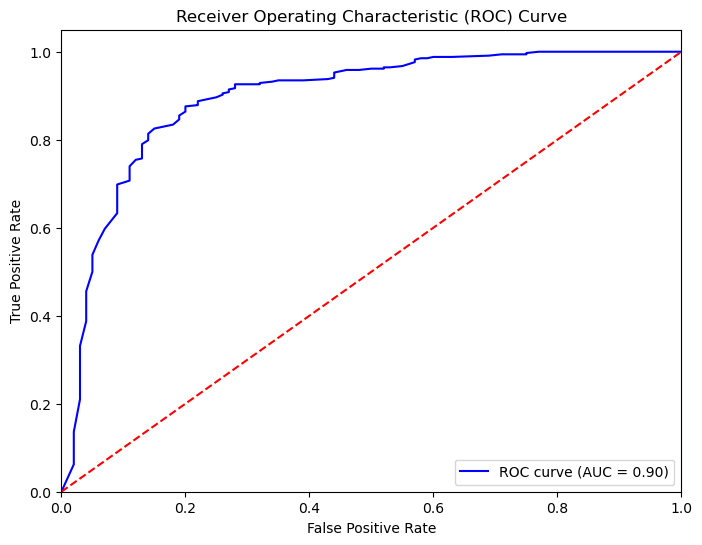

In [67]:
# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [68]:
auc_score = roc_auc_score(y_test, pred_prob)
print(f'AUC Score: {auc_score:.2f}')

ValueError: y should be a 1d array, got an array of shape (438, 2) instead.

### Checking the installation of LightGBM

In [51]:
import importlib.util

if importlib.util.find_spec("lightgbm") is not None:
    print("✅ LightGBM is installed.")
else:
    print("❌ LightGBM is NOT installed.")


✅ LightGBM is installed.


Training the model using LightGBM classifier

In [52]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [54]:
lgb_model = LGBMClassifier()
lgb_model.fit(X_train,Y_train)

[LightGBM] [Info] Number of positive: 1312, number of negative: 440
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1815
[LightGBM] [Info] Number of data points in the train set: 1752, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748858 -> initscore=1.092533
[LightGBM] [Info] Start training from score 1.092533


LGBMClassifier()

In [56]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

#predict probabilties
lgbm_y_pred_proba = lgb_model.predict_proba(x_test)

In [66]:
lgbm_y_pred_proba

array([[6.86612577e-03, 9.93133874e-01],
       [8.91989309e-03, 9.91080107e-01],
       [5.70784878e-02, 9.42921512e-01],
       [5.36196582e-02, 9.46380342e-01],
       [8.48867603e-01, 1.51132397e-01],
       [9.41118309e-01, 5.88816907e-02],
       [2.71590884e-01, 7.28409116e-01],
       [1.65330190e-02, 9.83466981e-01],
       [7.11421851e-02, 9.28857815e-01],
       [1.93500025e-03, 9.98065000e-01],
       [9.86334168e-01, 1.36658323e-02],
       [2.14441602e-01, 7.85558398e-01],
       [7.83129310e-01, 2.16870690e-01],
       [6.92242289e-04, 9.99307758e-01],
       [1.57864645e-02, 9.84213536e-01],
       [1.69718449e-01, 8.30281551e-01],
       [2.39547002e-02, 9.76045300e-01],
       [3.03818911e-01, 6.96181089e-01],
       [3.38996879e-01, 6.61003121e-01],
       [3.31460570e-02, 9.66853943e-01],
       [8.85793955e-03, 9.91142060e-01],
       [6.56243272e-03, 9.93437567e-01],
       [2.89871602e-02, 9.71012840e-01],
       [1.20219768e-01, 8.79780232e-01],
       [8.625448

In [58]:
# Threshold for binary classification
y_pred = (lgbm_y_pred_proba >= 0.5).astype(int)

In [60]:
#Evaluation
#print("Accuracy score",accuracy_score(y_test,y_pred))
print("ROC AUC",roc_auc_score(y_test,lgbm_y_pred_proba))
print("Confusion matrix",confusion_matrix(y_test,y_pred))
print("classification_report",classification_report(y_test,y_pred))

ValueError: y should be a 1d array, got an array of shape (438, 2) instead.

In [61]:
y_test

2051    1
1166    1
1829    1
2101    1
616     0
       ..
1353    1
837     1
1277    1
541     1
146     0
Name: rainfall, Length: 438, dtype: int64

In [62]:
type(y_test)

pandas.core.series.Series